In [2]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

from pathlib import Path

In [3]:
data_dir = Path('~/Desktop/spicy-data/').expanduser()

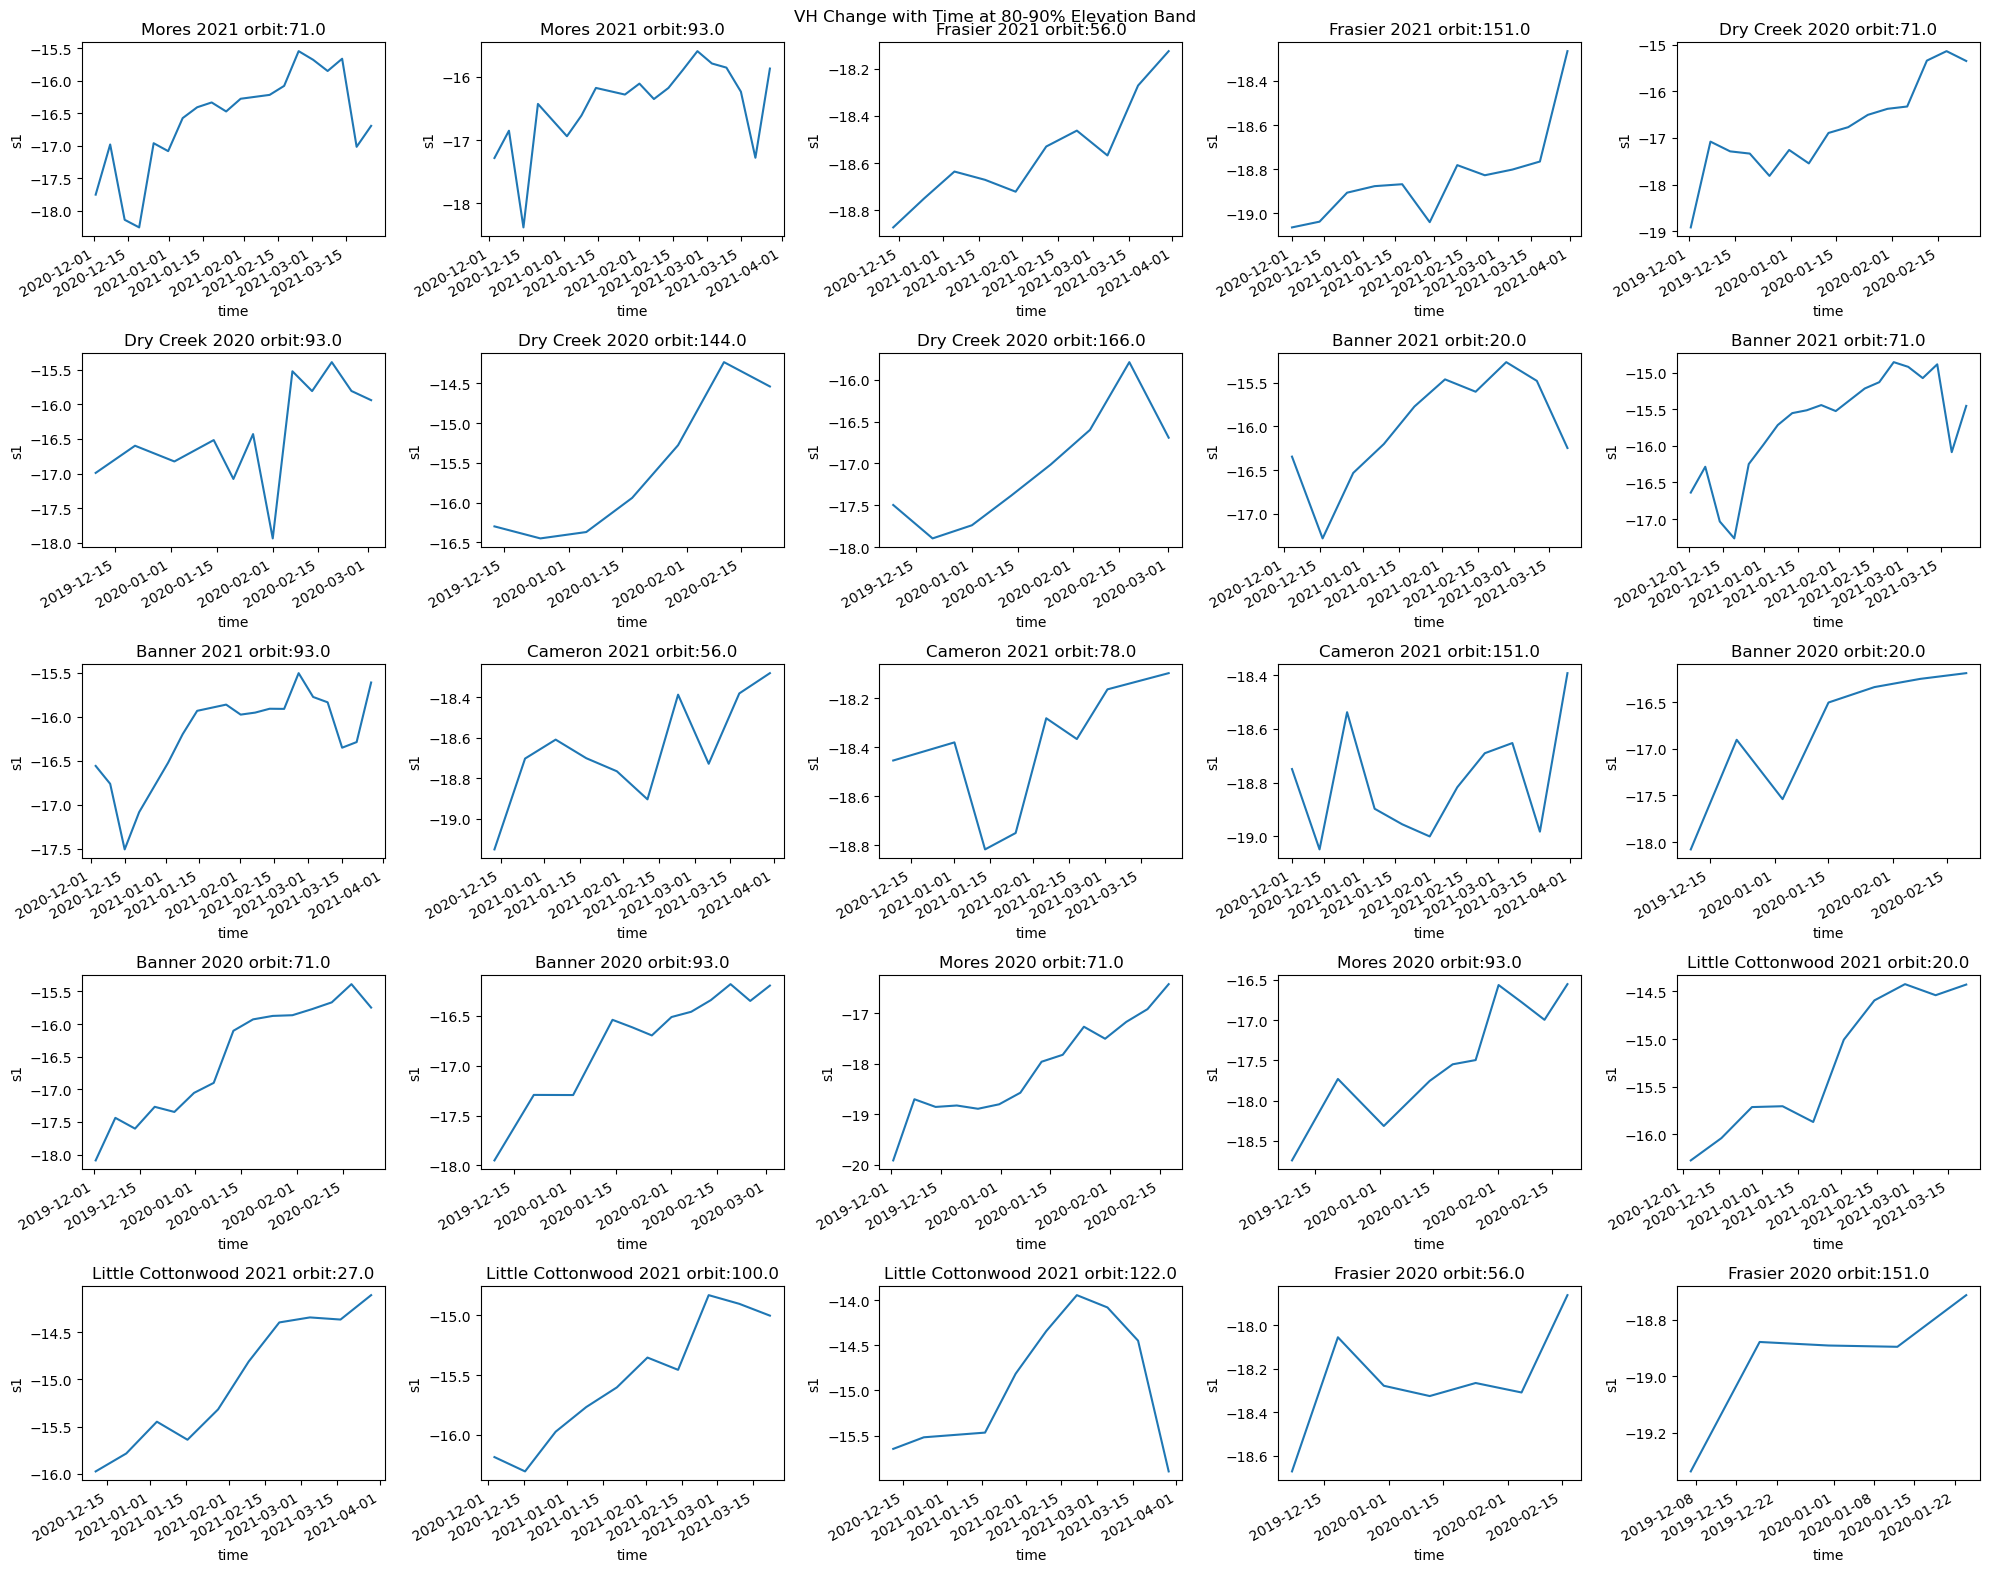

In [12]:
plots = 0
for fp in data_dir.glob('*.nc'):
    ds = xr.open_dataset(fp)
    for orbit, orbit_ds in ds.groupby('relative_orbit'):
        plots += 1

fig, axes = plt.subplots(5, 5, figsize = (20, 16))
i = 0
axes = axes.ravel()
for fp in data_dir.glob('*.nc'):
    ds = xr.open_dataset(fp)
    ds['CR'] = ds['s1'].sel(band = 'VH') - ds['s1'].sel(band = 'VV')
    start_t = f'{ds.time[0].dt.year.data.ravel()[0]}-12-01'
    ds = ds.load().sel(time = slice(start_t, None))
    for orbit, orbit_ds in ds.groupby('relative_orbit'):
        
        grouped = orbit_ds.groupby_bins('lidar-dem', 10) # .sel(time = ds.relative_orbit == 78)
        grouped = grouped.mean()['s1'].sel(band ='VH').sel({'lidar-dem_bins': list(grouped.groups.keys())[-2]})#.rolling(time = 2, min_periods = 1).mean()
        if (~grouped.isnull()).sum() != 0:
            grouped.plot(ax = axes[i])
            axes[i].set_title(f"{fp.stem.split('-')[0].replace('_', ' ')} orbit:{orbit}")
            i += 1

# for ax in axes[:-1]:
#     ax.set_xlabel('')
#     ax.set_ylabel('')
#     ax.set_xticklabels([])
#     ax.set_title('')
#     ax.set_yticks([])

# l_ax = axes[-1]
# l_ax.set_title('')

fig.suptitle("VH Change with Time at 80-90% Elevation Band")

plt.tight_layout()

In [38]:
np.unique(ds.relative_orbit.data)

array([ 56.,  78., 151.])

In [51]:
grouped = ds.load().sel(time = ds.relative_orbit == 56).sel(time = slice('2019-11-01')).groupby_bins('lidar-dem', 30) # .sel(time = ds.relative_orbit == 78)

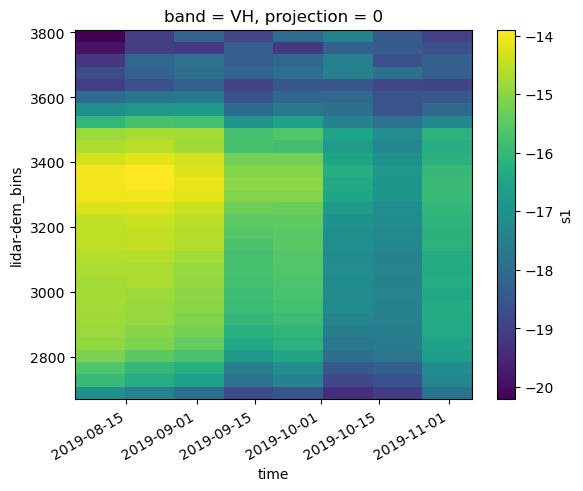

In [52]:
grouped.mean()['s1'].sel(band = 'VH').ffill('time').plot()